In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": "0.45"})
import pandas as pd
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
ents = [0.0, 0.01, 0.05, 0.1, 0.4, 0.8]
clips = [0.005, 0.02, 0.08, 0.2, 0.5, 0.8, 1e6]

In [3]:
def scatter(init_returns, fix_returns, ents, clips, y_max, y_min, tick):
    plt.figure(figsize=(8, 8))
    
    init = np.mean(init_returns, axis=0)[:, :, -1]
    fix = np.mean(fix_returns, axis=0)[:, :, -1]
    assert init.shape == fix.shape == (len(ents), len(clips))
    
    clips[-1] = 1.0
    
    data = []
    for i in range(len(ents)):
        for j in range(len(clips)):
            data_ij = [ents[i], clips[j], init[i, j], fix[i, j]]
            data.append(data_ij)
    data = pd.DataFrame(data, columns=["ent", "clip", "(Init)ClipR+ClipB", "FixClipR+PlainB"])
    
    ax = sns.scatterplot(data, x="(Init)ClipR+ClipB", y="FixClipR+PlainB", 
                    hue="clip", size="ent", 
                    legend="full",
                    sizes=(15, 200),
                    palette="Reds_r")
    
    ax.xaxis.set_major_locator(plticker.MultipleLocator(base=tick))
    ax.yaxis.set_major_locator(plticker.MultipleLocator(base=tick))

    print("Max x:", np.max(init))
    print("Max y:", np.max(fix))
    print("Min x:", np.min(init))
    print("Min y:", np.min(fix))     
    plt.xlim(left=y_min, right=y_max)
    plt.ylim(bottom=y_min, top=y_max)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()])
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    

def plot_returns(env_name, ents, clips, std_scale=0.1, y_max=None, y_min=None, tick=10):
    with open(f"./shared/CORRECTrepinit/{env_name}_CORRECTrepinit.npy", 'rb') as f:
        init_returns = np.load(f)
    assert len(init_returns.shape) == 4  # (n_seeds, n_ent, n_clip, n_exp)
    assert init_returns.shape[1:3] == (len(ents), len(clips))
    print("Shape:", init_returns.shape)
   
    with open(f"./shared/CORRECTfixed_rep/{env_name}_CORRECTfixed_rep_plainb.npy", 'rb') as f:
        fix_returns = np.load(f)
    assert len(fix_returns.shape) == 4  # (n_seeds, n_ent, n_clip, n_exp)
    assert fix_returns.shape[1:3] == (len(ents), len(clips))
    print("Shape:", fix_returns.shape)

    scatter(init_returns, fix_returns, ents, clips, y_max, y_min, tick)

## 1. Acrobot

Shape: (8, 6, 7, 50)
Shape: (8, 6, 7, 50)
Max x: -77.578125
Max y: -237.1796875
Min x: -500.0
Min y: -500.0


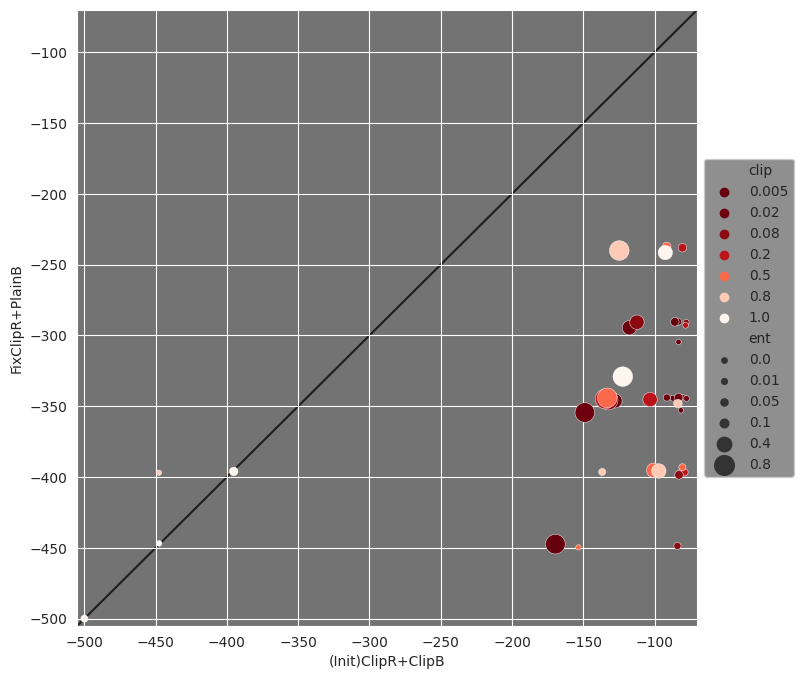

In [4]:
returns = plot_returns("Acrobot-v1", ents, clips, y_max=-70, y_min=-505, tick=50)

## 2. Asterix

Shape: (8, 6, 7, 63)
Shape: (8, 6, 7, 63)
Max x: 38.34375
Max y: 44.960938
Min x: 0.671875
Min y: 2.3984375


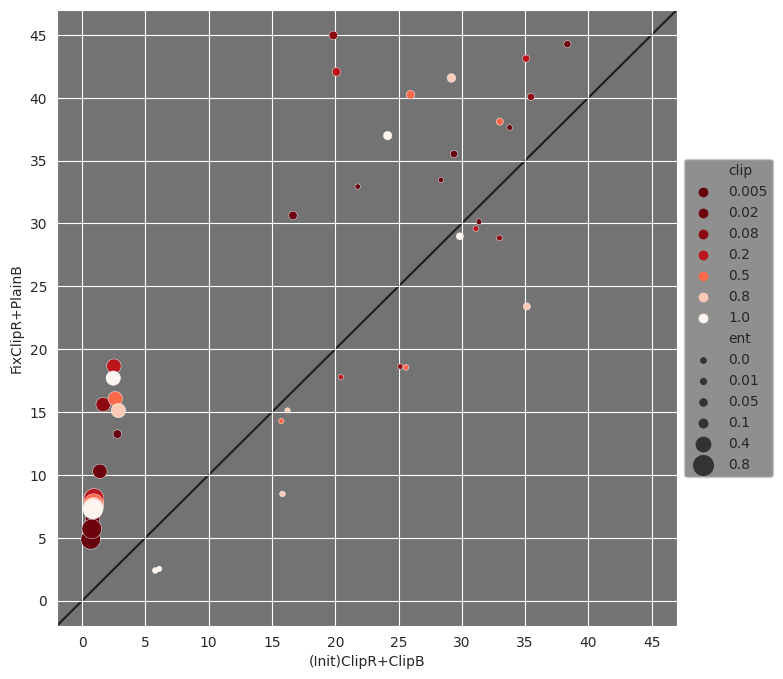

In [5]:
returns = plot_returns("Asterix-MinAtar", ents, clips, y_max=47, y_min=-2, tick=5)

## 3. Breakout

Shape: (8, 6, 7, 63)
Shape: (8, 6, 7, 63)
Max x: 81.15625
Max y: 90.375
Min x: 1.3203125
Min y: 4.21875


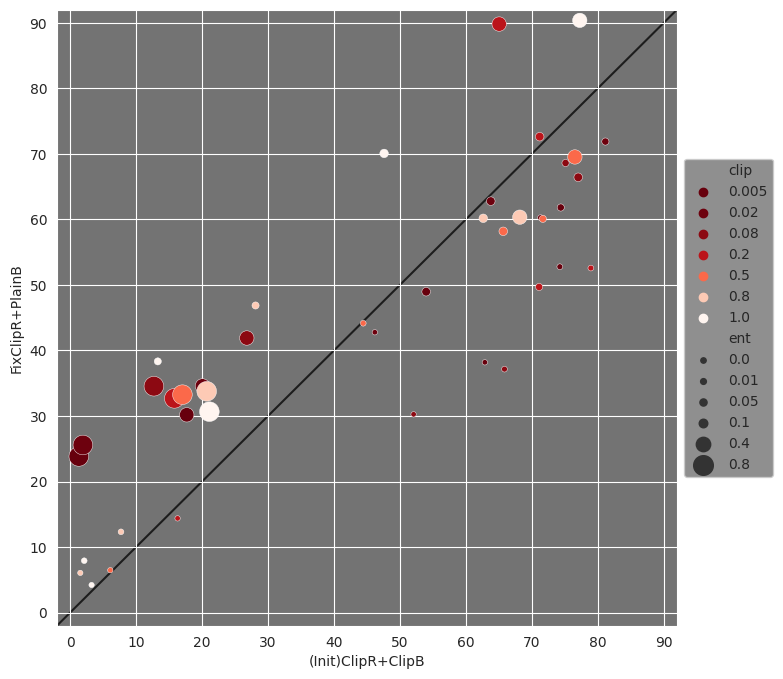

In [6]:
returns = plot_returns("Breakout-MinAtar", ents, clips, y_max=92, y_min=-2, tick=10)

## 4. CartPole

Shape: (8, 6, 7, 31)
Shape: (8, 6, 7, 31)
Max x: 500.0
Max y: 488.640625
Min x: 364.8203125
Min y: 52.2734375


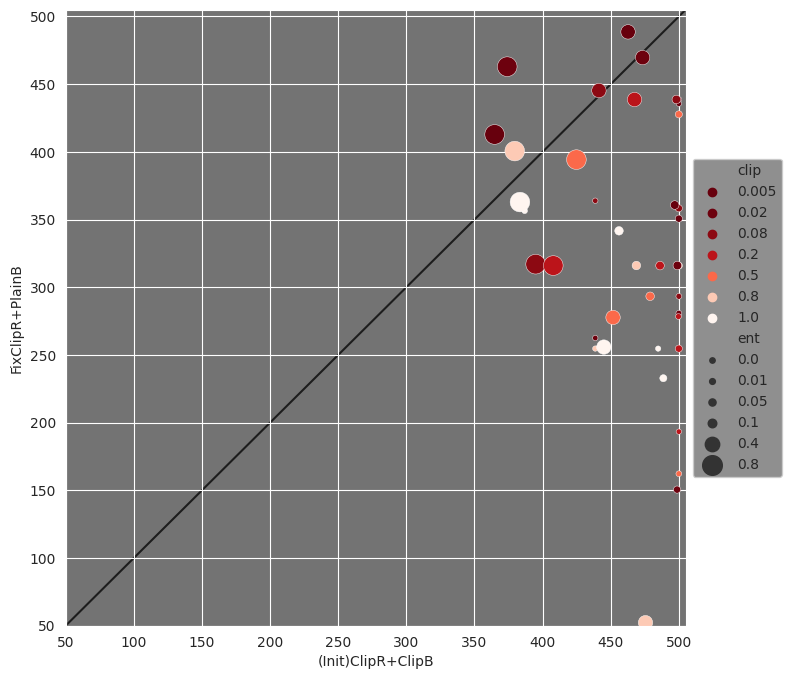

In [7]:
returns = plot_returns("CartPole-v1", ents, clips, y_max=505, y_min=50, tick=50)

## 5. Freeway

Shape: (8, 6, 7, 63)
Shape: (8, 6, 7, 63)
Max x: 64.61719
Max y: 63.304688
Min x: 0.5390625
Min y: 20.679688


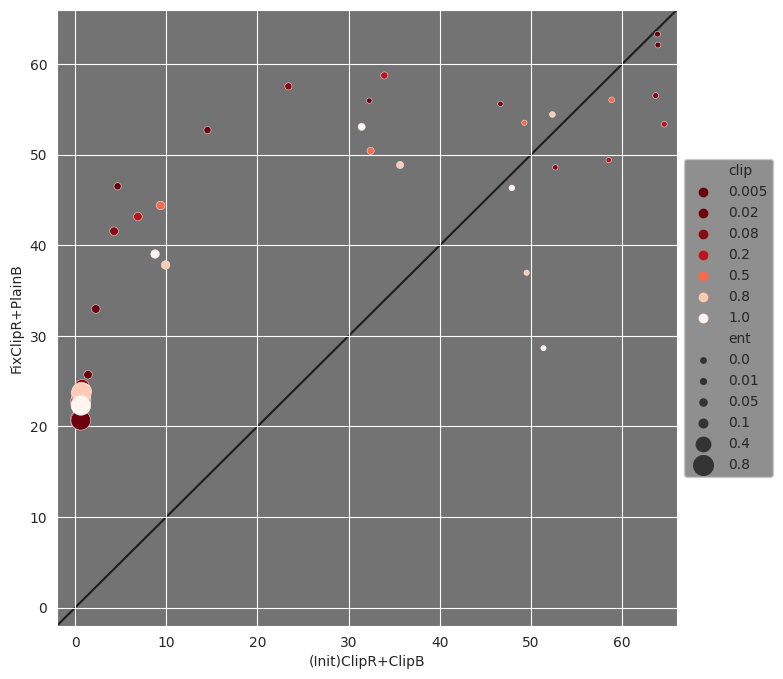

In [8]:
returns = plot_returns("Freeway-MinAtar", ents, clips, y_max=66, y_min=-2, tick=10)

## 6. MountainCar

Shape: (8, 6, 7, 26)
Shape: (8, 6, 7, 26)
Max x: -102.9296875
Max y: -135.9765625
Min x: -200.0
Min y: -200.0


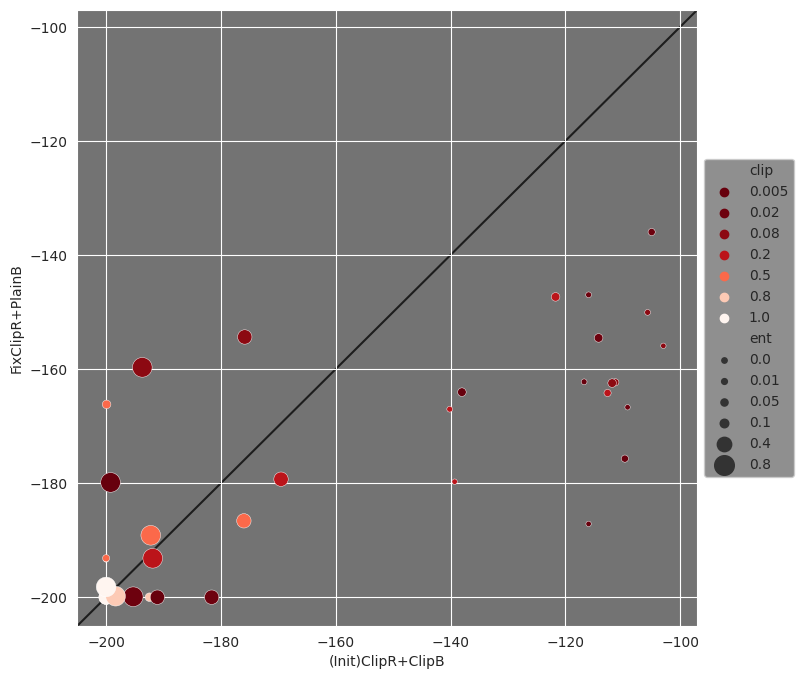

In [9]:
returns = plot_returns("MountainCar-v0", ents, clips, y_max=-97, y_min=-205, tick=20)

## 7. SpaceInvaders

Shape: (8, 6, 7, 63)
Shape: (8, 6, 7, 63)
Max x: 165.28125
Max y: 118.28125
Min x: 0.375
Min y: 2.0


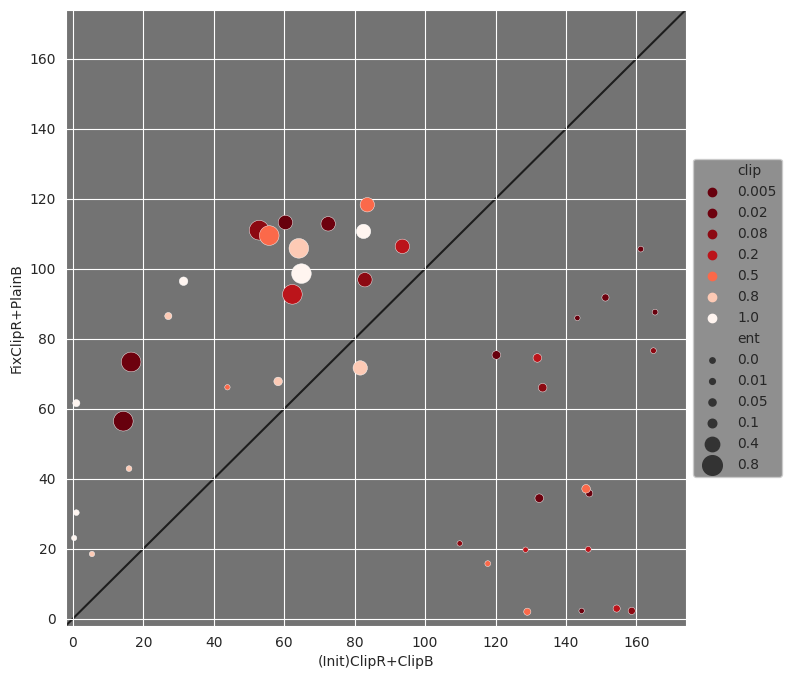

In [10]:
returns = plot_returns("SpaceInvaders-MinAtar", ents, clips, y_max=174, y_min=-2, tick=20)